In [2]:
from textblob import TextBlob
import pandas as pd
import nltk

In [3]:
data = pd.read_csv('cleaned_first_batch1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Name   10915 non-null  object 
 1   Average Rating  10915 non-null  float64
 2   Review Grade    10915 non-null  object 
 3   Title           10915 non-null  object 
 4   Review          10915 non-null  object 
 5   Rating          10915 non-null  int64  
 6   Time            10915 non-null  object 
 7   Review Count    10915 non-null  object 
 8   Country         10915 non-null  object 
 9   Status          5947 non-null   object 
 10  Month           10915 non-null  object 
 11  Month Numbers   10915 non-null  int64  
 12  Years           10915 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [5]:
data.head(3)

,Business Name,Average Rating,Review Grade,Title,Review,Rating,Time,Review Count,Country,Status,Month,Month Numbers,Years
0,Mabuhay Travel,4.9,Excellent,Excellent Service - Kathleen Gomez,"""HUGE THANK YOU KATHLEEN GOMEZ FOR YOUR EXCELL...",5,24-Nov-18,1,GB,NaN,Nov,11,2018
1,Singlife Philippines,4.6,Excellent,"""What I can say for now.""","""It was my first time to avail of Singlife's P...",4,"Updated Oct. 29, 2021",1,PH,Updated,Oct,10,2021
2,PNXBET,4.8,Excellent,#1 Betting site here in our country…,#1 Betting site here in our country good 24/7 ...,5,27-Dec-21,1,PH,NaN,Dec,12,2021


In [6]:
data['Rating Distance'] = data['Rating'] - data['Average Rating']


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

body_neg = []
body_neu = []
body_pos = []
body_com = []

title_neg = []
title_neu = []
title_pos = []
title_com = []

for row in data['Review']:
    body_neg.append(sia.polarity_scores(row)['neg'])
    body_neu.append(sia.polarity_scores(row)['neu'])
    body_pos.append(sia.polarity_scores(row)['pos'])
    body_com.append(sia.polarity_scores(row)['compound'])
    

for row in data['Title']:
    title_neg.append(sia.polarity_scores(row)['neg'])
    title_neu.append(sia.polarity_scores(row)['neu'])
    title_pos.append(sia.polarity_scores(row)['pos'])
    title_com.append(sia.polarity_scores(row)['compound'])

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['body_neg'] = body_neg
data['body_neu'] = body_neu
data['body_pos'] = body_pos
data['body_com'] = body_com

data['title_neg'] = title_neg
data['title_neu'] = title_neu
data['title_pos'] = title_pos
data['title_com'] = title_com

In [9]:
title_length = []

for row in data['Title']:
    title_length.append(len(word_tokenize(row)))
    
data['Title Length'] = title_length

In [10]:
body_length = []

for row in data['Review']:
    body_length.append(len(word_tokenize(row)))
    
data['Body Length'] = body_length

In [11]:
#data['Title Length'].mean()
#data['Body Length'].mean()

#print(data[(data['Country'] == 'PH')]['Body Length'].mean())
last = 5
start = 1

while start <= last:
    print(data[(data['Country'] == 'PH') & (data['Rating'] == start)]['Body Length'].mean())
    start += 1

#print(data[(data['Country'] != 'PH')]['Body Length'].mean())

groups = data[(data['Country'] == 'PH')].groupby('Rating')

#print(groups['Rating'].count())

79.32177088087631
70.85576923076923
56.56716417910448
41.87755102040816
24.41254125412541


In [12]:
data['Total Length'] = data['Title Length'] + data['Body Length']

In [13]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business Name    10915 non-null  object 
 1   Average Rating   10915 non-null  float64
 2   Review Grade     10915 non-null  object 
 3   Title            10915 non-null  object 
 4   Review           10915 non-null  object 
 5   Rating           10915 non-null  int64  
 6   Time             10915 non-null  object 
 7   Review Count     10915 non-null  object 
 8   Country          10915 non-null  object 
 9   Status           5947 non-null   object 
 10  Month            10915 non-null  object 
 11  Month Numbers    10915 non-null  int64  
 12  Years            10915 non-null  object 
 13  Rating Distance  10915 non-null  float64
 14  body_neg         10915 non-null  float64
 15  body_neu         10915 non-null  float64
 16  body_pos         10915 non-null  float64
 17  body_com    

,Business Name,Average Rating,Review Grade,Title,Review,Rating,Time,Review Count,Country,Status,...,body_neu,body_pos,body_com,title_neg,title_neu,title_pos,title_com,Title Length,Body Length,Total Length
0,Mabuhay Travel,4.9,Excellent,Excellent Service - Kathleen Gomez,"""HUGE THANK YOU KATHLEEN GOMEZ FOR YOUR EXCELL...",5,24-Nov-18,1,GB,NaN,...,0.496,0.478,0.9902,0.0,0.448,0.552,0.5719,5,66,71
1,Singlife Philippines,4.6,Excellent,"""What I can say for now.""","""It was my first time to avail of Singlife's P...",4,"Updated Oct. 29, 2021",1,PH,Updated,...,1.000,0.000,0.0000,0.0,1.000,0.000,0.0000,9,22,31
2,PNXBET,4.8,Excellent,#1 Betting site here in our country…,#1 Betting site here in our country good 24/7 ...,5,27-Dec-21,1,PH,NaN,...,0.854,0.146,0.4404,0.0,1.000,0.000,0.0000,8,28,36
3,PNXBET,4.8,Excellent,#1 betting site The One and Only…,#1 betting site The One and Only #PNXBET for t...,5,27-Dec-21,1,PH,NaN,...,1.000,0.000,0.0000,0.0,1.000,0.000,0.0000,8,24,32
4,PNXBET,4.8,Excellent,#1 betting site in the Philippines more…,#1 betting site in the Philippines more crazy ...,5,26-Dec-21,1,PH,NaN,...,0.817,0.000,-0.4005,0.0,1.000,0.000,0.0000,8,22,30


In [14]:
def check_english(target):
    words = set(nltk.corpus.words.words())
    sent = str(target)
    " ".join(w for w in nltk.wordpunct_tokenize(sent) \
             if w.lower() in words or not w.isalpha())
    
#defective function

In [15]:
from nltk.corpus import sentiwordnet as swn

In [16]:
for row in data['Title']:
    if sia.polarity_scores(row)['compound'] >= 0.05:
        print("{} = {}".format(row,'Positive'))
    elif sia.polarity_scores(row)['compound'] > -0.05 and sia.polarity_scores(row)['compound'] < 0.05:
        print("{} = {}".format(row,'Neutral'))
    else:
        print("{} = {}".format(row,'Negative'))
              

Excellent Service - Kathleen Gomez = Positive
"What I can say for now." = Neutral
#1 Betting site here in our country… = Neutral
#1 betting site The One and Only… = Neutral
#1 betting site in the Philippines more… = Neutral
#Excellent betting = Neutral
#noninjavan = Neutral
#pissedcustomerturnedhappysubscriber = Neutral
#reallyglobe = Neutral
#reallyglobe = Neutral
#reallyglobe = Neutral
$375 to cancel my flights during coronavirus lockdown = Negative
Underrated = Neutral
,suddenly checked my tracking Id… = Neutral
GHOST COURIER!!! = Negative
DON'T BOTHER BUYING HERE!!! = Positive
DON'T BOTHER BUYING HERE!!! = Positive
-1 STARS = Neutral
Highly Recommended = Positive
Good = Positive
0 Star = Neutral
0 rate = Neutral
0 stars = Neutral
0 stars = Neutral
Avoid all sellers using ninjavan as a courier = Negative
0.57mbs download and 0.28mbps upload… = Neutral
0.57mbs download and 0.28mbps upload… = Neutral
0031-200002580051 Entrego tracking… = Neutral
08-20-21 Seller dishonesty = Neutral
Po

Excellent Travel Agent BELLA… = Positive
Excellent agent Ms Chloe assisted us… = Positive
Excellent 5 Stars = Positive
Excellent and Legit betting site = Positive
Excellent = Positive
Excellent and easy to connect = Positive
Highly recommended = Positive
Excellent = Positive
Excellent and generous when it comes to… = Positive
Mabuhay travel Review = Neutral
Excellent and superb Cx service… = Positive
Excellent and very accurate and great … = Positive
Excellent = Positive
Excellent and very good experience 5… = Positive
Excellent and very helpful .. = Positive
Excellent and very professional… = Positive
Review = Neutral
Great Recharging Service = Positive
Excellent = Positive
Excellent betting site and customer… = Positive
Excellent betting site!! = Positive
Excellent betting site = Positive
Excellent betting site = Positive
Excellent betting site... = Positive
Excellent betting site = Positive
Excellent casino great games simple… = Positive
Excellent company = Positive
Excellent costum

How to see my password because i for… = Neutral
How to unlocked my account..i won 5k… = Positive
I  been  in  this  long  distance  for … = Neutral
I  highly recommend Mabuhay Travel = Positive
Excellent customer service = Positive
I  was really appreciated the way staff… = Positive
My Own Experience = Neutral
THIS STORE WILL MESS UP YOUR DAY. = Negative
The best customer service !!! = Positive
I HATE GLOBE = Negative
I HATE GLOBE = Negative
I HAVE ALWAYS HAD EXCELLENT SERVICE… = Positive
I HAVE USED THIS TRAVEL AGENCY SEVERAL… = Neutral
I Have a good experience with Mabuhay = Positive
WORST CONNECTION EVER = Negative
I LOVE EVERYTHING ABOUT YOUR SERVICE = Positive
I LOVE PNXBET❤❤❤ = Positive
HIGHLY RECCOMENDED = Neutral
I LOVE YOU PNXBET ! = Positive
I Love seeing my girlfriend happy and… = Positive
I AM NOT HAPPY WITH YOUR 2GO TEAM = Negative
HIGHLY RECOMMENDABLE :) = Positive
I Recharged twice but was not posted to… = Neutral
I Recommend switching to Converge = Positive
VERY RUDE! =

Can’t get a connection that works = Neutral
I give 5 star coz = Neutral
I give 5 stars because this site is too… = Neutral
I give 5star = Neutral
I give five star for Ryan because he is… = Neutral
I give here 5 stars = Neutral
Inexpensive rates but difficult to connect and sometimes noisy = Negative
Good Comeback = Positive
I got a good appraisal on my first… = Positive
I got an an announcement 3 days ago = Neutral
I got an email from lazada = Neutral
I got an email from lazada = Neutral
I got it for my mother on her birthday = Neutral
I got my 2019 gadget in excellent… = Neutral
I got my airpods few weeks after i got… = Neutral
I got my card in less than 3weeks = Neutral
I got my claim within 24 hrs = Neutral
I got my claims but hopefully next time… = Positive
I got my flowers and my wife loves them so much... = Positive
I got no refund yet for failed delivery… = Negative
I got tested for covid19 and turned out… = Neutral
Birthday bundle for mom = Neutral
Above and beyond service = Ne

I've been using TawagPinas to call my… = Neutral
Well trained staff = Positive
I've been using pldt home prepaid wifi… = Neutral
Very INCOMPETENT = Negative
PAL ignores the refund request = Negative
I've enquire for flight booking  and… = Neutral
flight prices = Neutral
I've had and still continue to have a… = Neutral
I've lived all around the world = Neutral
I've lost 8k their refund scheme is a… = Negative
Happy customer = Positive
Extremely slow and POOR SERVICE = Negative
Pldt slow internet, fast billing... bRUh = Neutral
Always late = Neutral
Complete package and reasonable price = Neutral
FANTASTIC! = Positive
I've ordered several times from Lazada = Neutral
Never use your card to pay!! = Negative
I've requested for at least 1 day's… = Neutral
Lazada Guarantee is a Scam = Negative
Lazada Guarantee is a Scam = Negative
Among the worst services in the PH = Negative
Always trusted, Always Efficient. = Positive
Failure of a want to be Amazon.  Useless customer service. = Negative
I'v

Isabel was very good = Positive
Booking flight = Neutral
Isabel was a big help! = Positive
Isabel was very helpful = Positive
Isabel was very patient and… = Neutral
Isabel was very profesional in every… = Neutral
Isabel who handled my transaction was … = Neutral
Isabel = Neutral
Friendly, Reliable Travel Agency With Great Customer Service! = Positive
Isabella was so pleasant to deal… = Positive
Isabelle has been very helpful wirh all… = Positive
Isobel and Remy were very prompt and… = Neutral
Isobel-Outstanding Customer Service = Neutral
QUick and Easy = Positive
It arrived on time = Neutral
It awesome to talk to someone with the… = Positive
Comments = Neutral
Great but with room for improvement = Positive
It could have been better if it was… = Positive
Lower calling cost to Philippines = Negative
It deserves zero star = Neutral
It deserves zero star = Neutral
Lousy 171 system. = Negative
It gave me peace of mind last year and… = Positive
It gives you high appraisal with low… = Neutral

Missing star is for the missing mobile … = Negative
Lack of understanding = Negative
Mixed up letter with the bouquet = Neutral
Fast and superb service. = Positive
Fast Approval. Legit airpods = Positive
Moneymax customer satisfaction to the nth level.. = Positive
Unparalleled value for money = Positive
Moneymax has a great customer service… = Positive
Moneymax in partnership with Mercantile… = Neutral
Moneymax insurance service is very… = Neutral
Moneymax is been helpful since 2016 and… = Positive
Great experience! = Positive
Negligible downside = Negative
Moneymax represenative Maki was very… = Neutral
Moneymax is the ONE! = Neutral
Moneymax <3 = Positive
Moneymax with the help of Sir Maki… = Positive
Thanks. = Positive
More excellent Service from Melissa = Positive
More improvement for the inquiries. = Positive
Nice = Positive
More than 5 star, Maam Sarah are lucky to have her in the Mabuhay travel Team! = Positive
More than late!! = Neutral
Most horrible courier service ever = Nega

One of the best flower store that offer… = Positive
PNX my savior! = Neutral
One of the convenient hassle free… = Neutral
One of the most garbage network!! = Neutral
Thank you Mabuhay Travel = Positive
One of the worst companies ever = Negative
One of the worst companies in the world… = Negative
One of the worst companies in the world… = Negative
One of the worst service given = Negative
One star is 500% too much!!! = Neutral
One thing = Neutral
One thing = Neutral
One time i received an incorrect item… = Neutral
One word "TRUST" = Neutral
Onlibe = Neutral
Online ordering and transaction were… = Neutral
Only 5 stars here = Neutral
Only care about money = Positive
Only complaint is time = Negative
Not too accesible location. U have to ride grab/taxi to get there = Neutral
Oops parcel can’t be found = Neutral
Biggest steaming pile of faeces I've ever seen = Neutral
Order Number 426429911605342 = Positive
Order Number 426429911605342 = Positive
Order Number:256596959270105 LAZADA SLOW IN 

Very accomodating = Neutral
Money Max is legit. = Neutral
Great service from MoneyMax! = Positive
Awesome Awesome Awesome! = Positive
Twice rejected my withdrawal what's dis = Negative
Super low appraisal = Positive
GOOD TRANSACTION = Positive
Incomplete items as described in Additional Information tab. = Neutral
Reliable and dependable! = Neutral
fast great efficient innovative = Positive
Great & fast service = Positive
Dependable and trusted = Positive
Very low appraisal. = Negative
Fast transaction and excellent item! = Positive
Fast and great customer service. = Positive
Fast processing and shipping = Neutral
Very convenient = Neutral
good service = Positive
Very good staff = Positive
Very past.easy to pawh. = Neutral
good service and fast transaction.. = Positive
a very realiable company. = Neutral
Professional and efficient staff! = Positive
it was fast and easy. = Positive
Fast changinf dession! = Neutral
this is use full = Neutral
I think my watch will be safe. = Positive
Good 

So farna good experience = Positive
So first of all your network is strong… = Neutral
So fvcking slow = Neutral
So fvcking slow = Neutral
Good game = Positive
So grateful with Joanna for her… = Positive
So happy for the services especially… = Positive
So happy with the scent = Positive
Excellent = Positive
Very Good. = Positive
A Very Bad Experience = Negative
Unbelievably bad Ninja service = Negative
The worst internet provider of the world - PLDT = Negative
So lovable 🥰🥰🥰 = Positive
Legit Online Store = Neutral
nobody answers the phone, longer to wait, delivery takes too long = Neutral
So nice and friendly highly recommend… = Positive
So nothing to say because it’s already… = Neutral
So reliable = Neutral
Awful Service = Negative
So satisfied = Positive
So slow U cant even Start a video without it cutting and the router shuting off i hate it i really hate it = Negative
So slow and my wifi is upgraded and its… = Neutral
Awesome delivery turnaround! = Positive
I just don't know why the

The flower arrangement that was… = Neutral
HIGHLY RECOMMENDED = Positive
The flower arrangement was superb = Positive
The flower bouquet are nicely prepared… = Positive
CORRECT ITEM BUT WRONG CARD = Negative
The flower delivery is on time = Neutral
The flower looks good = Positive
The flower was beautifull and well… = Neutral
The flowers I ordered are beautiful . = Positive
The flowers I ordered arrived on time…5 star service = Neutral
The flowers I ordered was at 1pm = Neutral
Five stars every time = Neutral
Loved it! = Positive
The flowers are beautiful  and it was… = Positive
The flowers are beautiful and fresh… = Positive
Exceed my expectations = Neutral
Fast Delivery and Good Quality = Positive
Amazing quality! = Positive
The flowers are great but the delivery… = Positive
Birthday Surprise Achieved = Positive
The flowers are nice and has beautiful… = Positive
The flowers are unquestionably great = Positive
The flowers arrived 45 minutes later… = Neutral
The flowers arrived fresh a

Can't be pawned? Why? = Neutral
They replaced the internet cable = Neutral
5 stars ⭐ = Neutral
They respond swift in the email = Positive
They respond to emails fast but If I… = Neutral
They response immediately regarding my… = Neutral
Everyone in this company is a liar. = Negative
They say they have an easy quarantee… = Positive
They made a mistake = Negative
They will cheat you! = Negative
The actual box size is 5x5 inches = Neutral
They should anticipate that they will… = Neutral
They side with the seller and useless vouchers = Negative
They smashed my guitar and refuse to… = Negative
Heartless Company. = Negative
They steal customer package = Negative
They still need to work on their… = Neutral
They stole my money = Neutral
They stole my money = Neutral
They stole my money = Neutral
worst delivery experience = Negative
Very irresponsible! = Negative
They use runner to deliver the parcel… = Neutral
They were always updating me through… = Neutral
They were on time with the delivery a

Great service for sports betting = Positive
Very nice website more power! = Positive
Pnx the best = Positive
Very nice = Positive
Very nice = Positive
Nice = Positive
Very nice.. = Neutral
Awesome = Positive
Very not happy my item arrived sg at… = Negative
Very patient and prompt in replying to… = Neutral
Very patient,friendly and respectful… = Neutral
Very pleasant and arranged as much as… = Positive
Very pleasant to talk to and helpful to… = Positive
Very pleased good service thank you… = Positive
Very pleased with the service = Positive
Very polite staff (Anne) and… = Neutral
Very polite staff and quick replies to… = Neutral
DISAPPOINTING FLOWERSHOP = Negative
Very poor customer service… = Negative
Lazada Poor Customer Service and Refund Issue = Negative
Very poor in terms of support and… = Negative
Very poor internet connection and slow… = Negative
Very poor logistics and always prone to… = Negative
Very poor service = Negative
Very poor service = Negative
Very poor service!! = Neg

You said 15 to 50 mbps. = Neutral
You said 15 to 50 mbps. = Neutral
You should change your company name to… = Neutral
Ninjavan is team of pathological liars = Negative
You should make your customer feel… = Neutral
You used to be good at what you do but… = Positive
You useless telecom company = Negative
You useless telecom company = Negative
You want to make it easy for people to… = Positive
Good value for your money = Positive
You're great, Mabuhay Travel Agency! = Positive
SLOW INTERNET AND FORCE YOU TO UPGRADE! = Neutral
Your WiFi is trash as hell like you are… = Negative
Your agent Chloe and Jacob was very …helpful, polite and very patient... = Neutral
Courier = Neutral
Very poor customer service… = Negative
Your delivery was bad = Negative
Your employee = Neutral
Your good office never mention = Positive
Your idea is too stupid changing the… = Negative
Your internet sucks i hope u go close… = Positive
Your product is Good :) = Positive
Too good to be true = Positive
Your service is

Cover is broken upon receipt of item = Negative
wrong item sent = Negative
Great service. = Positive
Great service! = Positive
Timely dekivered and as advertissd = Neutral
Super delayed! = Positive
good and fast = Positive
Good service. = Positive
Fast transfer = Neutral
Satisfied 😊 = Positive
really quick delivery! = Neutral
its authentic = Neutral
Affordable. = Neutral
Always good to work with. = Positive
delivery delayed = Negative
fast reeliable speed of trnsfer = Neutral
Good connection for a good price = Positive
good service = Positive
It seems like I'm using alcohol.. = Positive
great- all the time!!! = Positive
Fast and smooth delivery. = Neutral
never fail to do what i need = Positive
WORST COURIER IN PH. = Negative
Most of the succulents are not available = Neutral
Excellent service! = Positive
Lousy and not a reliable courier. = Negative
Slow af and gives false callouts. = Neutral
Super Delayed delivery. = Positive
Arrived on schedule will order again = Neutral
Prompt servi

F this wifi = Neutral
F this wifi = Neutral
okay lang = Positive
on time = Neutral
on time = Neutral
once i had the numbers inputed = Neutral
for Mama's Birthday = Neutral
one of the bad internet i've very… = Negative
one of the oldest courier in the… = Neutral
one of the worst delivery service.it… = Negative
only 4 star for now as i dont if i can… = Neutral
only I can say to the team you are so awesome = Positive
only one delivery attempt only = Neutral
Well Done. = Positive
order did not arrive = Neutral
3 boxes of coffee pod (keurig coffee ) = Neutral
MISSING IPAD = Negative
incomplete = Neutral
Good customer care = Positive
over all experience is satisfied = Positive
overall excellent!. = Neutral
overall = Neutral
On elizabeth arden perfume = Neutral
pawn hero help me a lot = Positive
philippine airlines are a fantastic airline... = Positive
fast and easy to connect = Positive
placed my order on Monday = Neutral
pldt and globe network connection = Neutral
pldt does not deserve that

what are you doing pldt = Neutral
Prompt and Attentive = Neutral
what you people don't understand is a… = Neutral
bad service expensive shipping charge = Negative
No money back! = Negative
worst = Negative
worst = Negative
worst courier ever = Negative
worst customer service = Negative
worst customer service = Negative
worst ever customer never got load and… = Negative
worst experience ever = Negative
i paid two weeks in advance and nada comes valentines day = Neutral
worst network ever = Negative
worst network ever = Negative
worst s.hit company in the philippines… = Negative
would like to say thank you and… = Positive
wrong item delivered = Negative
Worst = Negative
legit and safe = Positive
yes we will recommend your company = Positive
I am not happy = Negative
loads not recieved = Neutral
you dont deliver the parcel on its… = Neutral
you never store numbers being… = Neutral
you sold me a fake elizabeth arden… = Negative
you stated on your website that you… = Neutral
SCAMMERS = Neut

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
for row in data['Title']:
    print(word_tokenize(row))

['Excellent', 'Service', '-', 'Kathleen', 'Gomez']
['``', 'What', 'I', 'can', 'say', 'for', 'now', '.', "''"]
['#', '1', 'Betting', 'site', 'here', 'in', 'our', 'country…']
['#', '1', 'betting', 'site', 'The', 'One', 'and', 'Only…']
['#', '1', 'betting', 'site', 'in', 'the', 'Philippines', 'more…']
['#', 'Excellent', 'betting']
['#', 'noninjavan']
['#', 'pissedcustomerturnedhappysubscriber']
['#', 'reallyglobe']
['#', 'reallyglobe']
['#', 'reallyglobe']
['$', '375', 'to', 'cancel', 'my', 'flights', 'during', 'coronavirus', 'lockdown']
['Underrated']
[',', 'suddenly', 'checked', 'my', 'tracking', 'Id…']
['GHOST', 'COURIER', '!', '!', '!']
['DO', "N'T", 'BOTHER', 'BUYING', 'HERE', '!', '!', '!']
['DO', "N'T", 'BOTHER', 'BUYING', 'HERE', '!', '!', '!']
['-1', 'STARS']
['Highly', 'Recommended']
['Good']
['0', 'Star']
['0', 'rate']
['0', 'stars']
['0', 'stars']
['Avoid', 'all', 'sellers', 'using', 'ninjavan', 'as', 'a', 'courier']
['0.57mbs', 'download', 'and', '0.28mbps', 'upload…']
['0.57

['Easy', 'cash', 'in', 'and', 'cash', 'out']
['Pnxbet']
['Easy', 'cash', 'in', 'and', 'out']
['PNX', 'NUMBER', '1', 'BETTING', 'SITE']
['Easy', 'deposit', 'and', 'withdrawal']
['Easy', 'filing', 'of', 'claim', 'via', 'app']
['Reliable', 'online', 'shopping', 'experience']
['Bad', 'experience']
['Order', 'FS-20200519100274']
['Dengue', 'and', 'Covid', '19', 'Insurance']
['Easy', 'process', 'and', 'fast', 'disbursement', 'of…']
['Clear', 'calls', 'and', 'reliable', 'minutes']
['Room', 'for', 'improvement', '...']
['Easy', 'to', 'File', 'Claim']
['Easy', 'to', 'access', 'with', '.']
['Easy', 'to', 'access', ',', 'and', 'safe', 'for', 'credit…']
['Easy', 'to', 'apply']
['Easy']
['Easy', 'to', 'apply']
['Easy', 'to', 'avail']
['Easy', 'to', 'avail']
['Easy', 'to', 'bet', 'because', 'you', 'can', 'just', 'click…']
['Easy', 'to', 'bet', 'with', 'multiple', 'options', 'to…']
['Easy', 'to', 'bet']
['Easy', 'to', 'bet']
['Easy', 'to', 'bet']
['Easy', 'to', 'book']
['Easy', 'to', 'buy', ',', 'man

['Excellent', 'service']
['Excellent', 'service']
['Excellent', 'service']
['True', 'Filipino', 'service']
['Excellent', 'service']
['Excellent', 'service', '..']
['Excellent', 'service', '....', 'Very…']
['Excellent', 'service', '.']
['Excellent', 'service.Sarah', 'is', 'reliable', '…']
['Excellent', 'service', '.']
['Excellent', 'service']
['Excellent', 'service']
['Service']
['Excellent', 'services']
['Excellent', 'simple', 'service']
['Excellent', 'site', 'i', 'can', 'recharge', 'all', 'my…']
['Excellent', 'site']
['Excellent']
['Excellent', 'sportsbook']
['Excellent', 'staff', 'of', 'Mabuhay', 'Travel']
['Excellent', 'staff']
['Excellent', 'staff']
['Excellent', 'staffs']
['Excellent', 'support', 'and', 'resources', 'shown…']
['Excellent', 'support', 'from', 'Ate', 'Melissa']
['Excellent', 'teaching', 'and', 'explanations', 'of…']
['Mabuhay', '!', '!']
['Excellent', 'travel', 'agency', 'with', 'polite', 'and', '…']
['Excellent', 'travel', 'agency']
['Excellent', 'very', 'happy']
[

['I', 'always', 'have', 'awful', 'experience', 'every…']
['Love', 'it', '!']
['I', 'always', 'order', 'flowers', 'from', 'them', 'and…']
['All', 'good']
['Highly', 'recommendable', '.']
['I', 'always', 'use', 'mabuhay', 'travel', '.']
['I', 'always', 'using', 'mabuhay', 'travel', 'to', 'book…']
['I', 'am', 'Melody', 'Brookbank', 'and', 'I', 'would', 'like…']
['All', 'Good', 'While', 'Grabbing', 'Your', 'Money']
['All', 'Good', 'While', 'Grabbing', 'Your', 'Money']
['I', 'am', 'a', 'pleased', 'with', 'the', 'service', 'of', 'Ate…']
['I', 'am', 'a', 'regular', 'customer', 'of', 'Mabuhay…']
['Lazada', 'simply', 'can', 'not', 'provide', 'a', 'returns', 'label', 'for', 'an', 'item', 'that', 'was', "n't", 'ordered', '.']
['From', 'a', 'Novice', 'Trader']
['Unacceptable', 'Censor']
['I', 'am', 'a', 'very', 'satisfied', 'customer']
['5', 'stars']
['Phillipine', 'airlines']
['I', 'am', 'asking', 'for', 'further', 'assistance', 'but…']
['I', 'am', 'assited', 'by', 'miss', 'Anne']
['I', 'am', 'be

['I', 'have', 'always', 'been', 'suspicious', 'of', 'buying…']
['Chloe', ',', 'the', 'best', 'agent', 'ever', '!']
['fab', 'and', 'great']
['I', 'have', 'an', 'excellent', 'experience', 'with…']
['Shameless', ',', 'Despicable', 'Customer', 'Protection', '&', 'Service', 'Standards']
['23', '%', 'added', 'to', 'purchase', 'price', 'in', 'delivery', 'charges', '.']
['23', '%', 'added', 'to', 'purchase', 'price', 'in', 'delivery', 'charges', '.']
['Great', 'Customer', 'Service', '!']
['This', 'is', 'a', 'Fantastic', 'Company']
['I', 'have', 'been', 'a', 'long', 'term', 'customer', 'of…']
['I', 'have', 'been', 'a', 'long', 'term', 'customer', 'of…']
['Helps', 'a', 'lot']
['FLOWER', 'STORE', 'PH', 'IS', 'SUCH', 'A', 'LIFE', 'SAVER']
['I', 'have', 'been', 'booking', 'my', 'tickets', 'with…']
['LAZADA.com.ph', 'is', 'a', 'good', 'platform', '(', 'if', 'you', 'know', 'what', 'you', 'are', 'doing', ')']
['Good', 'but', 'not', 'Perfect']
['Heaven-sent', 'Organization', '!']
['I', 'have', 'been', 

['Im', 'happy', 'with', 'my', 'purchase', 'of', 'Singlife', '.', 'The', 'cost', 'is', 'reasonable', 'and', 'it', 'helps', 'a', 'lot', 'with', 'the', 'insured', 'in', 'this', 'time', 'of', 'covid', 'pandemic.More', 'power', 'and', 'God', 'bless']
['Im', 'happy', 'with', 'the', 'outcome', '&', '…']
['Im', 'impressed', 'with', 'the', 'way', 'Anne', 'has…']
['Ninja', 'Van', 'Slow', 'and', 'Lazy']
['Im', 'just', 'here', 'for', 'the', 'free', '$', '2']
['You', 'do', "n't", 'provide', 'the', 'service', 'we', 'are…']
['You', 'do', "n't", 'provide', 'the', 'service', 'we', 'are…']
['You', 'do', "n't", 'provide', 'the', 'service', 'we', 'are…']
['Im', 'not', 'a', 'avid', 'fan', 'of', 'online', 'selling']
['A', 'bit', 'withered', 'but', 'still', 'acceptable']
['Im', 'not', 'sure', 'if', 'the', 'CSR', 'will', 'make', 'action…']
['Im', 'pretty', 'sure', 'these', 'complaints', 'are…']
['Im', 'really', 'enjoying', 'playing', 'live', 'games']
['Im', 'sad', 'to', 'say', 'about', 'my', 'ticket', 'they…'

['Joanne', 'is', 'super', 'accommodating']
['Joanne', 'was', 'very', 'welcoming', 'and…']
['Disaster']
['Jogie', 'Arano', 'Martinez']
['Jogie', 'Martinez', 'guided', 'me', 'well…']
['Jogie', 'Martinez', 'has', 'been', 'our', 'advisor', 'for', 'the', 'past', '3', 'years']
['Jogie', 'Martinez', 'is', 'an', 'excellent', 'customer…']
['Jogie', 'Martinez']
['Jogie', 'did', 'a', 'great', 'providing', 'assistance…']
['JOGIE', 'MARTINEZ']
['Jogie', 'Martinez']
['Jogie', 'was', 'very', 'helpful', 'and', 'gives', 'timely…']
['John', 'is', 'very', 'responsive', 'and', 'very…']
['Joke', 'company', 'with', 'zero', 'customer…']
['Jose', 'Maria', '``', 'Maki', "''", 'Sevilla']
['Joy', 'Foster', 'helped', 'me', 'book', 'my', 'flights…']
['Excellent', 'Service']
['Joy', 'and', 'other', 'staffs', 'were', 'efficient', 'and…']
['Joy', 'foster', 'from', 'mabuhay', 'is', 'very', 'nice…']
['Very', 'satisfying', 'service', 'JOY', '!']
['Joy', 'has', 'helped', 'me', 'with', 'my', 'urgent…']
['Joy', 'is', 'a', 

['Bought', 'a', 'quality', 'leather', 'bag', ',', 'and', 'I', "'m", 'happy', 'with', 'everything']
['Delivers', 'on', 'time', '!']
['Parcel', 'disappearing', 'like', 'a', 'Ninja', '?']
['EAGET', 'M2', 'Type-C', 'USB3.1', 'Portable', 'SSD']
['Best', 'online', 'flower', 'store']
['Ordered', 'through', 'ZALORA', 'and', 'supposed', 'to…']
['Ordered', 'twice', 'and', 'both', 'of', 'them', 'were…']
['Ordered', 'two', '(', '2', ')', 'perfumes', 'already']
['Five', 'stars', '!', '!']
['Hassle-free', 'flower', 'ordering']
['Excellent', 'service']
['Beautiful', 'and', 'impressive']
['Ordering', 'from', 'Flowerstore', 'was…']
['Mind', 'Reading', 'Lazada', 'Deliveries', '....', 'Ordering', 'multiple', 'items', 'from', 'Lazada…']
['Happy', 'parents', 'of', 'the', 'chocolate', 'bouquet']
['Most', 'convenient', 'way', 'to', 'get', 'flowers', 'to', 'your', 'loved', 'one', '.']
['Ordering', 'process', 'is', 'so', 'efficient']
['great', 'first', 'experience']
['Ordering', 'was', 'quick', 'and', 'simple'

['REALLY', 'BAD', 'SERVICE']
['THE', 'WORST', '!', 'Don', '’', 't', 'order', 'anything', 'from', 'Lazada']
['WORSE', 'CUSTOMER', 'SERVICE']
['Highly', 'Recommended']
['Ras', 'is', 'very', 'accommodating', 'and', 'efficient…']
['Highly', 'recommended', 'insurance', 'broker', 'and', 'advisor']
['Ras', 'is', 'a', 'star', '!']
['Rassel', 'Bernal', 'was', 'very', 'knowledgeable…']
['Car', 'insurance', 'feedback']
['Rassel', 'Rebanal', 'has', 'been', 'very', 'helpful', 'in', 'assisting', 'me', 'to', 'get', 'my', 'car', 'insurance', 'renewed', '.']
['Rassel', 'Rebanal', 'is', 'my', 'agent', 'for', '2', 'years…']
['Rassel', 'Rebanal', 'is', 'very', 'good', 'advisor']
['Rassel', 'Rebanal', 'is', 'very', 'helpful', 'and…']
['Rating', '5', 'stars', ',', 'Always', 'great', 'to', 'buy', 'my…']
['Rating', 'Globe', 'as', '1-star', 'is', 'already…']
['Rating', 'Globe', 'as', '1-star', 'is', 'already…']
['Re-imburse', 'my', 'claim', 'hassle', 'FREE', 'and', 'very', 'simple.Just', 'follow', 'instruction

['Terrible', 'and', 'slow']
['Terrible', 'Service']
['Terrible', '!', 'Avoid', 'Lazada']
['Terrible']
['Tested', 'and', 'proven']
['Tested', 'positive', 'for', 'Covid-19', 'last…']
['Tested', 'positive', 'from', 'Covid', '19', 'and', 'I…']
['Texted', 'the', 'sendee', 'instead', 'of', 'the…']
['Thank', 'you', 'Chloe', 'for', 'excellent…']
['Thank', 'You', 'Ysabel']
['Free', 'Airpods']
['Thank', 'You', 'very', 'much', 'for', 'your', 'service']
['Excellent', 'Service', 'time', 'and', 'time', 'again']
['Thank', 'for', 'your', 'immediate…']
['Thank', 'u', 'Sarah', 'for', 'assisting', 'me…']
['Thank', 'u', 'singlife', 'for', 'this', 'claim', 'sana…']
['Thank', 'you', 'Remy', 'for', 'your', 'excellent…']
['Thank', 'you', 'Ann']
['Thank', 'you', 'to', 'Anne', 'Kepler', 'who', 'is', 'been', 'very', 'helpful', 'for', 'rebooking', 'my', 'ticket', '!', 'She', 'is', 'very', 'friendly', ',', 'kind', 'and', 'response', 'very', 'quickly', '!', 'Thank', 'you', 'Again', 'Anne', 'I', 'will', 'look', 'for

['The', 'flowers', 'were', 'even', 'more', 'wonderful…']
['Wedding', 'anniversary', 'gift']
['The', 'flowers', 'were', 'fresh', 'and', 'received', 'by…']
['Truth', 'in', 'Advertising']
['The', 'flowers', 'were', 'great', 'but', 'you', 'swamped…']
['The', 'flowers', 'were', 'lovely']
['Thumbs', 'Up', '!']
['Technical', 'Issue', '+', 'Failed', 'Delivery']
['Learn', 'to', 'Trade', 'and', 'Smartcharts']
['The', 'freebies', 'send', 'to', 'me', '2', 'months', 'after…']
['The', 'games', 'i', 'play', 'go', '999', 'ping', '99', 'percent…']
['The', 'globe', 'at', 'home', 'internet', 'is', 'really…']
['The', 'globe', 'at', 'home', 'internet', 'is', 'really…']
['The', 'good', 'thing', 'I', 'experienced', 'with', 'Learn…']
['PLDT', ',', 'the', 'Destroyer', 'of', 'Mental', 'Health']
['The', 'hell', 'bakit', 'pag', 'foreign', 'company…']
['The', 'hell', 'bakit', 'pag', 'foreign', 'company…']
['Good', 'Way', 'to', 'Start', 'Learning', 'Forex']
['Easy', 'Transaction', ',', 'quality', 'flowers', 'with',

['Very', 'delayed', 'delivery']
['Excellent', 'choice', '!']
['Very', 'deplorable', 'experience']
['Very', 'disappointed', 'about', 'the', 'delivery']
['Very', 'disappointed', 'in', 'this', 'company']
['Enormous', 'dissapointment']
['Valentines', 'day', 'ruined']
['Very', 'diverse']
['Excellent', 'service']
['Very', 'easy', 'and', 'everything', 'about', 'the…']
['Very', 'easy', 'and', 'fast', 'transaction']
['Very', 'easy', 'and', 'quick']
['Very', 'easy', 'and', 'quick', '...', 'I', 'will', 'be', 'a…']
['Flight', 'booking']
['Very', 'easy', 'process']
['Very', 'easy']
['Very', 'easy', 'to', 'apply']
['Very', 'easy', 'to', 'bet', 'and', 'very', 'accomodating…']
['Very', 'easy', 'to', 'claim', 'and', 'released', 'fast']
['Very', 'easy', 'to', 'communicate', 'with']
['Effective']
['Very', 'easy', 'to', 'navigate', 'and', 'more', 'games', 'to…']
['Superb', 'Customer', 'Service']
['Very', 'easy', 'to', 'transact']
['Very', 'easy', 'to', 'understand', 'the', 'rules', 'of…']
['Very', 'easy',

['Well', 'attended', 'by', 'ms.remy']
['Well', 'done', 'Joana', 'easy', 'to', 'talked', 'and', 'very…']
['Well', 'done']
['Well', 'done', '..']
['Great']
['Well', 'i', 'been', 'ordering', 'from', 'here', 'I', 'never…']
['bad', 'for', 'poor', 'people', 'and', 'online', 'class', '..']
['Well', 'pleased', 'with', 'the', 'service', ',', 'very', 'accomodating', '.', 'Highly', 'recommended']
['Wonderful', 'Sarah', 'she', "'s", 'brilliant', '!', '!', '!']
['PawnHero', 'is', 'the', 'Best']
['Doing', 'a', 'great', 'job', 'consistently']
['Best', 'and', 'legit', 'Online', 'Casino', 'Site']
['Went', 'into', 'PLDT', 'to', 'sign', 'up', 'for', 'fibfe…']
['We', '’', 're', 'very', 'satisfied', 'and', 'how', 'they', 'pls…']
['We', '’', 've', 'attended', 'our', 'query', 'attentively…']
['Unfortunate', 'customer', 'service', 'and', 'no', 'internet', '.']
['Unfortunate', 'customer', 'service', 'and', 'no', 'internet', '.']
['Why', 'does', 'anybody', 'use', 'this', 'company', '?']
['GOOD', 'SERVICE']
['A'

['Ease', 'of', 'using', 'the', 'website']
['Very', 'helpful', '!']
['no', 'problems', 'using', 'service']
['simple', 'and', 'quick']
['Very', 'helpful', 'and', 'professional']
['i', 'got', 'no', 'problem', 'with', 'the', 'process', '..']
['Service', 'is', 'always', 'good', 'and', 'fast', '!']
['Good', 'Customer', 'Service', 'and', 'Fast', 'Delivery', '!']
['Amazing', 'products']
['Fast', 'and', 'authentic']
['Great', '&', 'legitimate', 'products']
['Legit', 'and', 'original']
['Excellent', '!', '!', '!']
['My', 'order', 'never', 'arrived.🙃']
['Excellent', 'service', 'from', 'Joanna']
['Delivery', 'was', 'one', 'hour', 'late', '.']
['On', 'time', 'delivery']
['Transaction', 'is', 'fast', 'and', 'sufficient']
['very', 'satisfied', 'HAROLD', 'HARTRICK']
['Excellent', 'Service']
['Sir', 'Zandro', 'is', 'very', 'accommodating', '.']
['Have', "n't", 'received', 'my', 'package', '🙁']
['Low', 'aprissal']
['Nice', 'because', 'it', 'cod', 'without', 'question']
['Original', 'and', 'Quality', '💕'

['if', 'you', 'are', 'looking', 'for', 'a', 'betting', 'site…']
['top', 'betting', 'site', 'in', 'asia', '100', '%', 'legit']
['if', 'you', 'want', 'an', 'isp', 'with', 'intense', 'and…']
['if', 'you', 'want', 'an', 'isp', 'with', 'intense', 'and…']
['im', 'not', 'sure', 'if', 'this', 'product', 'i', 'got', 'is', 'original']
['im', 'using', 'this', 'tawagpinas', 'website', 'very…']
['imelda', 'was', 'so', 'helpful', 'to', 'get', 'the', 'best…']
['in', 'close', 'range', 'its', '50mbps', 'but', 'when…']
['inconsistent', 'service']
['intermittent', 'connection', 'i', 'pay', '3000…']
['winnings', 'kept', 'and', 'giving', 'a', 'negative', 'balance', 'to', 'a', 'player', 'who', 'won', '.']
['is', 'very', 'bad', 'service', 'I', 'encounter', 'so', 'far']
['usefull']
['it', 'has', 'a', 'been', 'a', 'year']
['easycall']
['Nice', 'meeting', 'you', '.', '(', 'smile', ')']
['Amazing', 'and', 'Satisfies', 'Costumer', 'here', '!', '⭐👍']
['it', 'ok']
['it', 'says', '20s', 'but', 'it', 'takes', '20', '

In [19]:
ph = []
non_ph = []
all_countries = []

for index, row in data.iterrows():
    all_countries.append(sia.polarity_scores(row["Title"])['compound'])
    if row["Country"] == 'PH':
        ph.append(sia.polarity_scores(row["Title"])['compound'])
    else:
        non_ph.append(sia.polarity_scores(row["Title"])['compound'])

        


0.1308910565110565
0.2183981496881497
0.16945350435180945


Text(0.5, 1.0, 'Average Review Title Sentiment Compound Score')

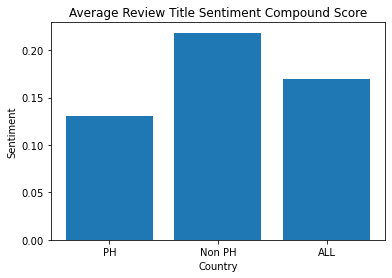

In [20]:
import statistics

print(statistics.mean(ph))
print(statistics.mean(non_ph))
print(statistics.mean(all_countries))

import matplotlib.pyplot as plt 

stats = [statistics.mean(ph),statistics.mean(non_ph),statistics.mean(all_countries)]

rating = [1,2,3,4,5]

names = ['PH', 'Non PH', 'ALL']
values = [statistics.mean(ph),statistics.mean(non_ph),statistics.mean(all_countries)]
plt.bar(names, values)
plt.xlabel('Country')
plt.ylabel('Sentiment')
plt.title('Average Review Title Sentiment Compound Score')


In [21]:
r_ph = []
r_non_ph = []
r_all_countries = []

for index, row in data.iterrows():
    r_all_countries.append(sia.polarity_scores(row["Review"])['compound'])
    if row["Country"] == 'PH':
        r_ph.append(sia.polarity_scores(row["Review"])['compound'])
    else:
        r_non_ph.append(sia.polarity_scores(row["Review"])['compound'])
        



0.20354728910728911
0.36691654885654884
0.2755405222171324


Text(0.5, 1.0, 'Average Review Body Sentiment Compound Score')

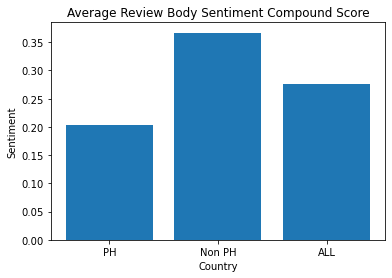

In [22]:
import statistics
print(statistics.mean(r_ph))
print(statistics.mean(r_non_ph))
print(statistics.mean(r_all_countries))

names = ['PH', 'Non PH', 'ALL']
values = [statistics.mean(r_ph),statistics.mean(r_non_ph),statistics.mean(r_all_countries)]
plt.bar(names, values)
plt.xlabel('Country')
plt.ylabel('Sentiment')
plt.title('Average Review Body Sentiment Compound Score')

In [23]:
x = data[data['Country'] == 'PH']['Rating'].mean()
y = data[data['Country'] != 'PH']['Rating'].mean()
z = data['Rating'].mean()
#data[data['Country']]['Rating'].mean()

TypeError: list indices must be integers or slices, not numpy.float64

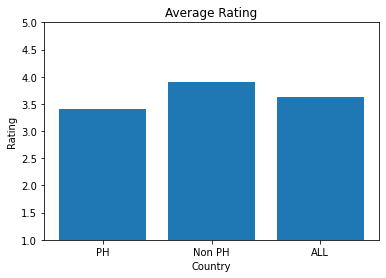

In [24]:
names = ['PH', 'Non PH', 'ALL']
values = [x,y,z]
#plt.setp(plt.gca(), ylim=(1, 5))
plt.ylim(1,5)
plt.bar(names, values)
plt.xlabel('Country')
plt.ylabel('Rating')
plt.title('Average Rating')
width = 1

plt.bar(values[x], width = width)
plt.show()

In [ ]:
#df = pd.DataFrame(data)
#df.to_csv('new.csv')

In [ ]:
ph_hashtag = 0
non_ph_hashtag = 0


for index, row in data.iterrows():
    if row['Country'] == 'PH':
        for i in word_tokenize(row['Review']):
            if i == '#':
                ph_hashtag += 1
    else:
        for i in word_tokenize(row['Review']):
            if i == '#':
                non_ph_hashtag += 1
        
                

In [ ]:
#print(ph_hashtag)
#print(non_ph_hashtag)
hashtags = 0


for index, row in data.iterrows():
    if row['Country'] == 'PH' and row['Rating'] == 1:
        for i in word_tokenize(row['Title']):
            if i == '...':
                hashtags += 1
            
    
print(hashtags)

In [ ]:
ph_exclam = 0
non_ph_exclam = 0

for index, row in data.iterrows():
    if row['Country'] == 'PH':
        for i in word_tokenize(row['Review']):
            if i == '!':
                ph_exclam += 1
    else:
        for i in word_tokenize(row['Review']):
            if i == '!':
                non_ph_exclam += 1
        

In [ ]:
print(ph_exclam)
print(non_ph_exclam)

In [ ]:
ph_ellipses = 0
non_ph_ellipses = 0

for index, row in data.iterrows():
    if row['Country'] == 'PH':
        for i in word_tokenize(row['Review']):
            if i == '...':
                ph_ellipses += 1
    else:
        for i in word_tokenize(row['Review']):
            if i == '...':
                non_ph_ellipses += 1

In [ ]:
print(ph_ellipses)
print(non_ph_ellipses)

In [ ]:
import re

# http://stackoverflow.com/a/13752628/6762004
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

len(re.findall(RE_EMOJI, '😀😀😇😇😚😚🥶🥶'))



In [ ]:
ph_emoji = 0
non_ph_emoji = 0

for index, row in data.iterrows():
    if row['Country'] == 'PH':
        for i in word_tokenize(row['Review']):
            ph_emoji += len(re.findall(RE_EMOJI, stringers))
    else:
        for i in word_tokenize(row['Review']):
            if i == '...':
                non_ph_emoji += len(re.findall(RE_EMOJI, stringers))

In [ ]:
#print(ph_emoji,non_ph_emoji)
emojis = 0

for index, row in data.iterrows():
    if row['Country'] == 'PH' and row['Rating'] == 1:
        for i in word_tokenize(row['Review']):
            emojis += len(re.findall(RE_EMOJI, stringers))

print(emojis)

In [ ]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist

stopword = nltk.corpus.stopwords.words('english')
print(len(stopword))
new_stopwords  = ["n't", "'s","’", "..", "\'s"]
stopword.extend(new_stopwords)
print(len(stopword))
print(stopword)

In [ ]:
ph_stopwords = {}

non_ph_stopwords = {}
import string
from nltk.probability import FreqDist

fdist = FreqDist

""" 
def processed(token):
    punctuations = set(string.punctuation)
    result = ""
    for i in token:
        if i not in punctuations and i.isdigit() == False:
            result += i
    return result

"""
        
for row in data[(data['Country'] == 'PH')]['Review']:
    lowered = row.lower()
    stripped = lowered.strip()
    tokenized = word_tokenize(stripped)
    #cleaned_tokens = processed(tokenized)
    punctuations = set(string.punctuation)
    #stop_words = set(stopword)
    
    
    for token in tokenized:
        if token not in punctuations and token not in stopword and token != "\'s'":
            if token in ph_stopwords:
                ph_stopwords[token] += 1
            else:
                ph_stopwords[token] = 1

 

    
fdist(ph_stopwords)

In [ ]:
from collections import Counter
words = Counter(ph_stopwords)

for x,y in words.most_common(20):
    print ('%s: %i' % (x, y))

In [ ]:
for row in data[(data['Country'] != 'PH')]['Review']:
    lowered = row.lower()
    stripped = lowered.strip()
    tokenized = word_tokenize(stripped)
    punctuations = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    
    for token in tokenized:
        if token not in punctuations and token not in stopword:
            if token in non_ph_stopwords:
                non_ph_stopwords[token] += 1
            else:
                non_ph_stopwords[token] = 1
                

In [ ]:
non_ph_words = Counter(non_ph_stopwords)
for x,y in non_ph_words.most_common(20):
    print ('%s: %i' % (x, y))

In [ ]:
print(non_ph_words)

In [ ]:
ph_pos = {}

for row in data[(data['Country'] == 'PH')]['Review']:
    tokenized = word_tokenize(row)
    punctuations = set(string.punctuation)
    token_list = []
    for token in tokenized:
        if token not in punctuations:
            token_list.append(token.lower())
    for t in nltk.pos_tag(token_list):
        #print(t[1])
        if t in ph_pos:
            ph_pos[t] += 1
        else:
            ph_pos[t] = 1
    
ph_pos = Counter(ph_pos)
for x,y in ph_pos.most_common(10):
    print ('%s: %i' % (x, y))

In [ ]:
non_ph_pos = {}

for row in data[(data['Country'] != 'PH')]['Review']:
    tokenized = word_tokenize(row)
    punctuations = set(string.punctuation)
    token_list = []
    for token in tokenized:
        if token not in punctuations:
            token_list.append(token.lower())
    for t in nltk.pos_tag(token_list):
        #print(t[1])
        if t in non_ph_pos:
            non_ph_pos[t] += 1
        else:
            non_ph_pos[t] = 1
            

non_ph_pos = Counter(non_ph_pos)
for x,y in non_ph_pos.most_common(10):
    print ('%s: %i' % (x, y))



In [ ]:
last = 5
start = 1

while start <= last:
    print(data[(data['Country'] == 'PH') & (data['Rating'] == start)]['Body Length'].mean())
    start += 1

In [ ]:
listahan = {}

for row in data[(data['Country'] == 'PH') & (data['Rating'] == 1)]['Title']:
    lowered = row.lower()
    stripped = lowered.strip()
    tokenized = word_tokenize(stripped)
    #cleaned_tokens = processed(tokenized)
    punctuations = set(string.punctuation)
    #stop_words = set(stopword)
    
    
    for token in tokenized:
        if token not in punctuations and token not in stopword and token != "\'s'":
            if token in listahan:
                listahan[token] += 1
            else:
                listahan[token] = 1

 

    
fdist(listahan)

listahan = Counter(listahan)
for x,y in listahan.most_common(20):
    print ('%s: %i' % (x, y))

In [ ]:
pos = {}

for row in data[(data['Country'] != 'PH') & (data['Rating'] == 2)]['Title']:
    tokenized = word_tokenize(row)
    punctuations = set(string.punctuation)
    token_list = []
    for token in tokenized:
        if token not in punctuations:
            token_list.append(token.lower())
    for t in nltk.pos_tag(token_list):
        #print(t[1])
        if t in pos:
            pos[t] += 1
        else:
            pos[t] = 1
            

pos = Counter(pos)
for x,y in pos.most_common(10):
    print ('%s: %i' % (x, y))


In [ ]:
posi = []
neut = []
nega = []
comp = []

for index, row in data.iterrows():
    #all_countries.append(sia.polarity_scores(row["Title"])['compound'])
    if row["Country"] == 'PH' and row['Rating'] == 5:
        posi.append(sia.polarity_scores(row["Review"])['pos'])
        neut.append(sia.polarity_scores(row["Review"])['neu'])
        nega.append(sia.polarity_scores(row["Review"])['neg'])
        comp.append(sia.polarity_scores(row["Review"])['compound'])
        
print(sum(posi)/len(posi))
print(sum(neut)/len(neut))
print(sum(nega)/len(nega))
print(sum(comp)/len(comp))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business Name    10915 non-null  object 
 1   Average Rating   10915 non-null  float64
 2   Review Grade     10915 non-null  object 
 3   Title            10915 non-null  object 
 4   Review           10915 non-null  object 
 5   Rating           10915 non-null  int64  
 6   Time             10915 non-null  object 
 7   Review Count     10915 non-null  object 
 8   Country          10915 non-null  object 
 9   Status           5947 non-null   object 
 10  Month            10915 non-null  object 
 11  Month Numbers    10915 non-null  int64  
 12  Years            10915 non-null  object 
 13  Rating Distance  10915 non-null  float64
 14  body_neg         10915 non-null  float64
 15  body_neu         10915 non-null  float64
 16  body_pos         10915 non-null  float64
 17  body_com    

In [158]:
emojis = []
emojis_body = []
import re
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

for index, row in data.iterrows():
    emojis.append(len(re.findall(RE_EMOJI, row['Title'])))


data['Title Emoji'] = emojis


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Business Name       10915 non-null  object 
 1   Average Rating      10915 non-null  float64
 2   Review Grade        10915 non-null  object 
 3   Title               10915 non-null  object 
 4   Review              10915 non-null  object 
 5   Rating              10915 non-null  int64  
 6   Time                10915 non-null  object 
 7   Review Count        10915 non-null  object 
 8   Country             10915 non-null  object 
 9   Status              5947 non-null   object 
 10  Month               10915 non-null  object 
 11  Month Numbers       10915 non-null  int64  
 12  Years               10915 non-null  object 
 13  Rating Distance     10915 non-null  float64
 14  body_neg            10915 non-null  float64
 15  body_neu            10915 non-null  float64
 16  body

In [52]:
ph = []

for index, row in data.iterrows():
    if row['Country'] == 'PH' and row['Rating'] == 5:
        ph.append(len(re.findall(RE_EMOJI, row['Review'])))
        
len(ph)
sum(ph)

462

In [64]:
emojis_body = []
import re
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

for index, row in data.iterrows():
    emojis_body.append(len(re.findall(RE_EMOJI, row['Review'])))


data['Body Emoji'] = emojis_body


#data.info()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business Name    10915 non-null  object 
 1   Average Rating   10915 non-null  float64
 2   Review Grade     10915 non-null  object 
 3   Title            10915 non-null  object 
 4   Review           10915 non-null  object 
 5   Rating           10915 non-null  int64  
 6   Time             10915 non-null  object 
 7   Review Count     10915 non-null  object 
 8   Country          10915 non-null  object 
 9   Status           5947 non-null   object 
 10  Month            10915 non-null  object 
 11  Month Numbers    10915 non-null  int64  
 12  Years            10915 non-null  object 
 13  Rating Distance  10915 non-null  float64
 14  body_neg         10915 non-null  float64
 15  body_neu         10915 non-null  float64
 16  body_pos         10915 non-null  float64
 17  body_com    

In [ ]:
hashtag_counts = []


for index, row in data.iterrows():
     for i in word_tokenize(row['Title']):
        hashtags = 0
        if i == '...':
            hashtags += 1
        hashtag_counts.append(hashtags)
        
#print(hashtag_counts)
print(len(hashtag_counts))

In [90]:
ellipses = []
ellipsis = 0

for row in word_tokenize(data['Title']):
    print(row)
    

TypeError: expected string or bytes-like object

In [84]:
x = 'Cheselle...'

word_tokenize(x)

['Cheselle', '...']

In [122]:
ellipses = []

for row in data['Title']:
    if '...' not in word_tokenize(row):
        ellipses.append(0)
    else:
        ellipsis = 0
        for i in word_tokenize(row):
            if i == '...':
                ellipsis += 1
        ellipses.append(ellipsis)

print(len(ellipses))
print(len(data['Title']))

data['Title Ellipses'] = ellipses

10915
10915


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business Name    10915 non-null  object 
 1   Average Rating   10915 non-null  float64
 2   Review Grade     10915 non-null  object 
 3   Title            10915 non-null  object 
 4   Review           10915 non-null  object 
 5   Rating           10915 non-null  int64  
 6   Time             10915 non-null  object 
 7   Review Count     10915 non-null  object 
 8   Country          10915 non-null  object 
 9   Status           5947 non-null   object 
 10  Month            10915 non-null  object 
 11  Month Numbers    10915 non-null  int64  
 12  Years            10915 non-null  object 
 13  Rating Distance  10915 non-null  float64
 14  body_neg         10915 non-null  float64
 15  body_neu         10915 non-null  float64
 16  body_pos         10915 non-null  float64
 17  body_com    

In [130]:
ellipses_body = []

for row in data['Review']:
    if '...' not in word_tokenize(row):
        ellipses_body.append(0)
    else:
        ellipsis = 0
        for i in word_tokenize(row):
            if i == '...':
                ellipsis += 1
        ellipses_body.append(ellipsis)

print(len(ellipses_body))
print(len(data['Review']))

data['Body Ellipses'] = ellipses_body

10915
10915


In [134]:
hashtags = []

for row in data['Title']:
    if '#' not in word_tokenize(row):
        hashtags.append(0)
    else:
        hashhash = 0
        for i in word_tokenize(row):
            if i == '#':
                hashhash += 1
        hashtags.append(hashhash)

print(len(hashtags))
print(len(data['Review']))

data['Title Hashtags'] = hashtags

10915
10915


In [145]:
hashtagsb = []

for row in data['Review']:
    if '#' not in word_tokenize(row):
        hashtagsb.append(0)
    else:
        hashhash = 0
        for i in word_tokenize(row):
            if i == '#':
                hashhash += 1
        hashtagsb.append(hashhash)

print(len(hashtagsb))
print(len(data['Review']))

data['Body Hashtags'] = hashtagsb

10915
10915


In [138]:
ext = []

for row in data['Title']:
    if '!' not in word_tokenize(row):
        ext.append(0)
    else:
        hashhash = 0
        for i in word_tokenize(row):
            if i == '!':
                hashhash += 1
        ext.append(hashhash)

print(len(ext))
print(len(data['Review']))

data['Title Exclamations'] = ext

10915
10915


In [147]:
exb = []

for row in data['Review']:
    if '!' not in word_tokenize(row):
        exb.append(0)
    else:
        hashhash = 0
        for i in word_tokenize(row):
            if i == '!':
                hashhash += 1
        exb.append(hashhash)

print(len(exb))
print(len(data['Review']))

data['Body Exclamations'] = exb

10915
10915


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Business Name       10915 non-null  object 
 1   Average Rating      10915 non-null  float64
 2   Review Grade        10915 non-null  object 
 3   Title               10915 non-null  object 
 4   Review              10915 non-null  object 
 5   Rating              10915 non-null  int64  
 6   Time                10915 non-null  object 
 7   Review Count        10915 non-null  object 
 8   Country             10915 non-null  object 
 9   Status              5947 non-null   object 
 10  Month               10915 non-null  object 
 11  Month Numbers       10915 non-null  int64  
 12  Years               10915 non-null  object 
 13  Rating Distance     10915 non-null  float64
 14  body_neg            10915 non-null  float64
 15  body_neu            10915 non-null  float64
 16  body

In [160]:
data['Title Emoji'].sum()

286

In [168]:
print(data['Status'].value_counts())

status = []

#0 = Null
#1 = Updated
#2 = Verified
#3 = Invited

for row in data['Status']:
    if row == 'Updated':
        status.append(1)
    elif row == 'Verified':
        status.append(2)
    elif row == 'Invited':
        status.append(3)
    else:
        status.append(0)
        
print(len(status))

data['Status Rank'] = status

Verified    2976
Invited     1916
Updated     1055
Name: Status, dtype: int64
10915


In [170]:
data.info()

data.to_csv('processed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Business Name       10915 non-null  object 
 1   Average Rating      10915 non-null  float64
 2   Review Grade        10915 non-null  object 
 3   Title               10915 non-null  object 
 4   Review              10915 non-null  object 
 5   Rating              10915 non-null  int64  
 6   Time                10915 non-null  object 
 7   Review Count        10915 non-null  object 
 8   Country             10915 non-null  object 
 9   Status              5947 non-null   object 
 10  Month               10915 non-null  object 
 11  Month Numbers       10915 non-null  int64  
 12  Years               10915 non-null  object 
 13  Rating Distance     10915 non-null  float64
 14  body_neg            10915 non-null  float64
 15  body_neu            10915 non-null  float64
 16  body